# Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [ ]:
# Membaca Dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# mengganti tipe data total charges menjadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
tc_mean = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(tc_mean)
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.duplicated().sum()

np.int64(22)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.342338
std,0.368947,24.534965,30.069001,2265.044153
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


# Data Preprocessing

In [ ]:
X = df.drop('Churn', axis=1)
y= df['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
y.value_counts()

,count
Churn,
No,5164
Yes,1857


In [ ]:
kolom_kategori = X.select_dtypes(include='object').columns
kolom_kategori

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
kolom_numerik = X.select_dtypes(include='number').columns
kolom_numerik

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
# Encoding untuk fitur kategorikal
encoders = {}

for col in kolom_kategori:
  label_encoder = LabelEncoder()
  X[col] = label_encoder.fit_transform(X[col])
  encoders[col] = label_encoder

In [ ]:
# Encoding untuk fitur numerik
scaler = StandardScaler()
X[kolom_numerik] = scaler.fit_transform(X[kolom_numerik])

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,-0.440508,1,0,-1.282728,0,1,0,0,2,0,0,0,0,0,1,2,-1.164135,-0.998061
1,1,-0.440508,0,0,0.062387,1,0,0,2,0,2,0,0,0,1,0,3,-0.262811,-0.176981
2,1,-0.440508,0,0,-1.241967,1,0,0,2,2,0,0,0,0,0,1,3,-0.365914,-0.963490
3,1,-0.440508,0,0,0.510759,0,1,0,2,0,2,2,0,0,1,0,0,-0.750058,-0.198506
4,0,-0.440508,0,0,-1.241967,1,0,1,0,0,0,0,0,0,0,1,2,0.194503,-0.944284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.440508,1,1,-0.345224,1,2,0,2,0,2,2,2,2,1,1,3,0.663458,-0.132388
7039,0,-0.440508,1,1,1.611307,1,2,1,0,2,2,0,2,2,1,1,1,1.275428,2.239656
7040,0,-0.440508,1,1,-0.875118,0,1,0,2,0,0,0,0,0,0,1,2,-1.172450,-0.858275
7041,1,2.270104,1,0,-1.160445,1,2,1,0,0,0,0,0,0,0,1,3,0.317562,-0.875870


In [ ]:
y = df['Churn'].replace({'Yes':1, 'No':0})

/tmp/ipython-input-1981524087.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Churn'].replace({'Yes':1, 'No':0})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Data latih(X): {X_train.shape}')
print(f'Data Uji(X): {X_test.shape}')

Data latih(X): (5616, 19)
Data Uji(X): (1405, 19)


# Model Building

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model_dt.predict(X_test)

akurasi = accuracy_score(y_test, y_pred)
print(akurasi)

0.7266903914590748


# Evaluasi

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[851 182]
 [202 170]]


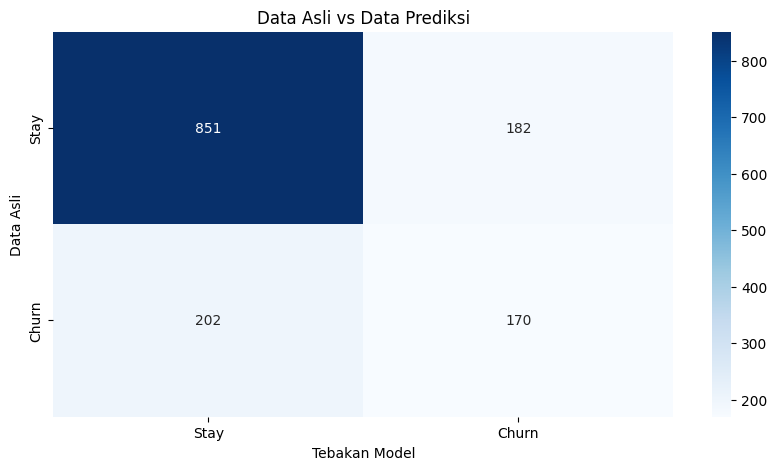

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, fmt='d', cmap='Blues', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'], annot=True)
plt.title('Data Asli vs Data Prediksi')
plt.xlabel('Tebakan Model')
plt.ylabel('Data Asli')
plt.show()

# Business Insights

In [ ]:
df_fi = pd.DataFrame({
    'Fitur':X.columns,
    'Nilai Penting':model_dt.feature_importances_
})
df_fi

,Fitur,Nilai Penting
0,gender,0.020602
1,SeniorCitizen,0.014347
2,Partner,0.013450
3,Dependents,0.022074
4,tenure,0.105313
5,PhoneService,0.003915
6,MultipleLines,0.015127
7,InternetService,0.022062
8,OnlineSecurity,0.041226
9,OnlineBackup,0.013205


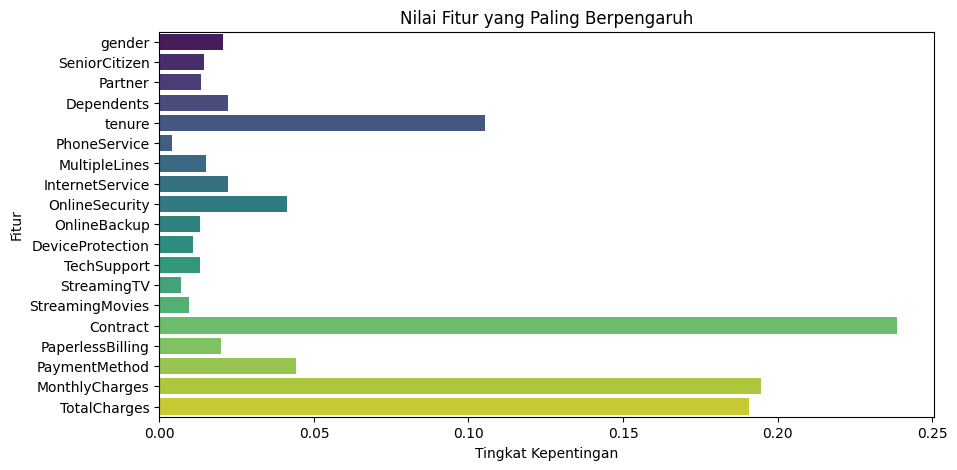

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Nilai Penting', y='Fitur', data=df_fi, palette='viridis', hue='Fitur')
plt.title('Nilai Fitur yang Paling Berpengaruh')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.show()

In [ ]:
nilai_label_contract = pd.crosstab(index=df['Contract'],
                                   columns=df['Churn'],
                                   normalize='index')

nilai_label_contract

Churn,No,Yes
Contract,,
Month-to-month,0.573579,0.426421
One year,0.887305,0.112695
Two year,0.971681,0.028319


<Axes: xlabel='Contract'>

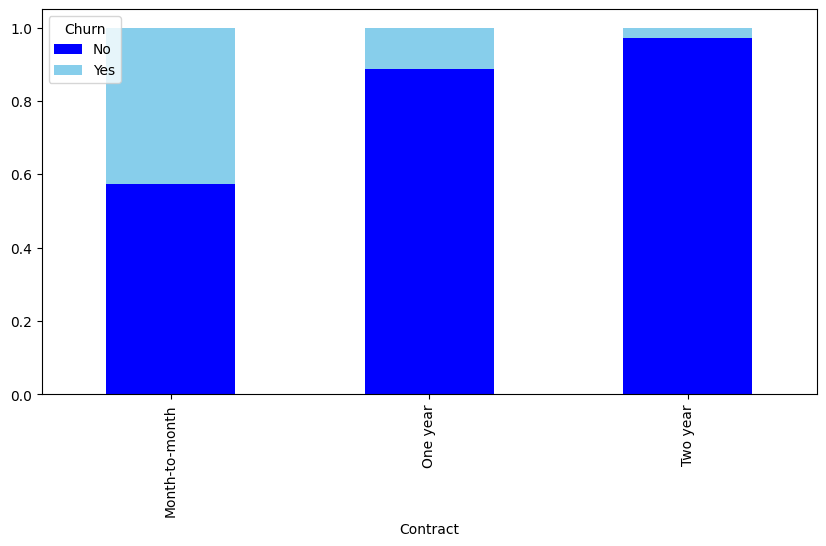

In [ ]:
ax = nilai_label_contract.plot(kind='bar',
                               stacked=True,
                               color=['Blue', 'skyblue'],
                               figsize=(10, 5))
ax

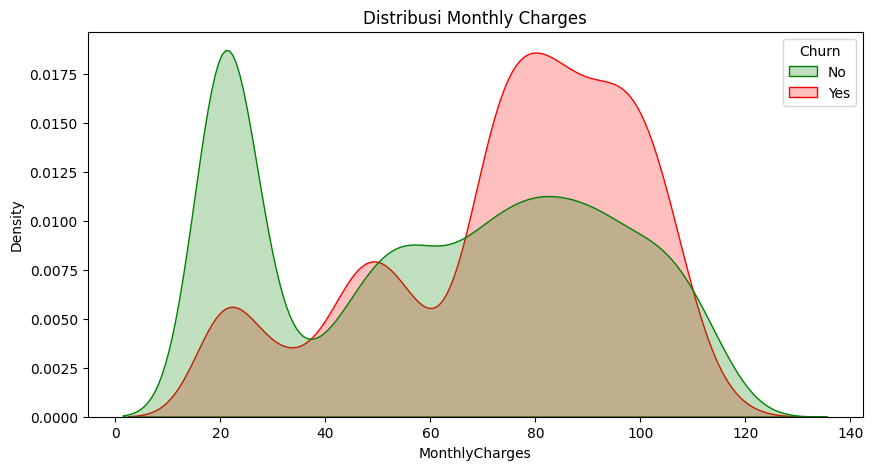

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette=['green', 'red'], common_norm=False)
plt.title('Distribusi Monthly Charges')
plt.show()

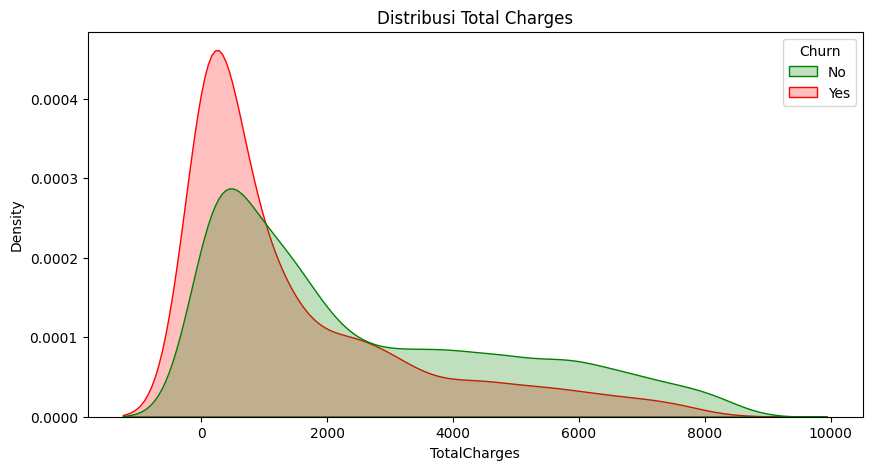

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, palette=['green', 'red'], common_norm=False)
plt.title('Distribusi Total Charges')
plt.show()